In [1]:
import pandas as pd
import numpy as np
import sys
from matplotlib import pyplot as plt
import os

Function to read results/stats from the output reports

In [2]:
def getStat(dataDirectory, stats = ["simSeconds"], statNames = ['sSec'],columnNames = ["test", "device", "condition"]):
    fileNames = os.listdir(dataDirectory)
    filePaths = [os.path.join(dataDirectory, '', i, 'stats.txt').replace('\\','/') for i in fileNames]
    dfStats = pd.DataFrame([i.split("_") for i in fileNames],columns= columnNames)
    dfStats[statNames] = None
    dfStats["file"] = fileNames
    for fileIdx in range(len(dfStats)):
        for statIdx in range(len(stats)):
            with open(filePaths[fileIdx]) as f:
                readlines = f.readlines()
                for l in readlines:
                    if stats[statIdx] in l:
                        dfStats[statNames[statIdx]][fileIdx] = float(l.split()[1])
    dfStats = dfStats.sort_values(by=columnNames)
    return dfStats

Function to plot desired stats

In [4]:
def plotStats(df, xFactor, yValue, fillFactor,scaleFac = 1):
    xLevels = np.unique(df[xFactor])
    fillLevels = np.unique(df[fillFactor])

    df = df.sort_values(by=[xFactor])

    barWidth = 1/(len(xLevels)+1)
    colors = getCmap(len(fillLevels)+1)

    for sIdx in range(len(yValue)):
        s = yValue[sIdx]
        plt.figure()
        inds = np.arange(len(xLevels))
        for fillIdx in range(len(fillLevels)):
            f = fillLevels[fillIdx]
            plt.bar(inds, df[s][df[fillFactor]==f]*scaleFac,width = barWidth, color = colors(fillIdx), edgecolor ='grey', label =f)
            inds = [x + barWidth for x in inds]
        plt.xticks([r + barWidth for r in range(len(xLevels))], xLevels)
        plt.legend()
        plt.xlabel(xFactor, fontweight ='bold', fontsize = 15)
        plt.ylabel(s, fontweight ='bold', fontsize = 15)

In [5]:
def getCmap(n, name='hsv'):
    '''Returns a function that maps each index in 0, 1, ..., n-1 to a distinct 
    RGB color; the keyword argument name must be a standard mpl colormap name.'''
    return plt.cm.get_cmap(name, n)

Read stats sample using defined functions

    test device rdPrct          rBW (GB/s)          wBW (GB/s)            file
8  m5out   ddr3    R50   4757298246.850823   4829487124.681857  m5out_ddr3_R50
5  m5out   ddr3     RO  10813346263.297775                 0.0   m5out_ddr3_RO
2  m5out   ddr3     WO                 0.0  11080562149.297314   m5out_ddr3_WO
3  m5out   ddr4    R50   7584099206.333008   7731104167.152448  m5out_ddr4_R50
4  m5out   ddr4     RO  17943311840.151024                 0.0   m5out_ddr4_RO
1  m5out   ddr4     WO                 0.0  17653445743.629044   m5out_ddr4_WO
7  m5out    nvm    R50   1170086689.623155   1194404833.467871   m5out_nvm_R50
6  m5out    nvm     RO   6013847785.399859                 0.0    m5out_nvm_RO
0  m5out    nvm     WO                 0.0   1956526453.870762    m5out_nvm_WO


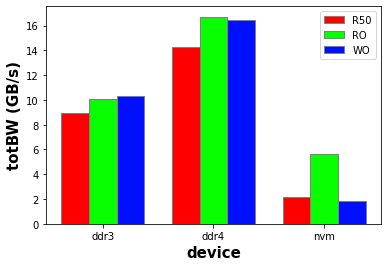

In [6]:
dataDirectory = '/workspaces/gem5-bootcamp-env/traffGenRes'
columnNames = ["test", "device", "rdPrct"]
stats = ['system.generator.readBW',
         'system.generator.writeBW']
statNames = ['rBW (GB/s)',"wBW (GB/s)"]
df = getStat(dataDirectory, stats ,statNames ,columnNames)
print(df)
df["totBW (GB/s)"] = df["rBW (GB/s)"]+df["wBW (GB/s)"]

# plotStats(df, xFactor = "device", yValue = ["rBW (GB/s)","wBW (GB/s)","totBW (GB/s)"], fillFactor = "rdPrct")
plotStats(df, xFactor = "device", yValue = ["totBW (GB/s)"], fillFactor = "rdPrct",scaleFac = 1/(1024*1024*1024))